# NBA Players stat
Данные NBA: https://www.kaggle.com/drgilermo/nba-players-stats

In [93]:
import numpy as np
import pandas as pd

# загружаем данные
players = pd.read_csv('data/Players.csv')
seasons = pd.read_csv('data/Seasons_Stats.csv')

# дропаем первые ненужные колонки в обоих сетах
players.drop(players.columns[0], axis=1, inplace=True)
seasons.drop(seasons.columns[0], axis=1, inplace=True)

# удаляем строки без имени игрока
seasons = seasons[pd.notnull(seasons.Player)]

# добавляем в seasons дату из players
seasons['height'] = seasons.Player.apply(lambda x: players.height[players.Player == x].values[0])
seasons['weight'] = seasons.Player.apply(lambda x: players.weight[players.Player == x].values[0])

# удаляем дату с пропущенными значениями
seasons.dropna(axis=1, inplace=True)

# посчитаем индекс массы тела
seasons['bmi'] = seasons['weight'] / np.power(seasons['height']/100,2)

# добавим колонку для учета очков, набранных в среднем за игру
seasons['pts_per_game'] = seasons['PTS'] / seasons['G']

seasons.head(10)

,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,bmi,pts_per_game
0,1950.0,Curly Armstrong,G-F,FTW,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,23.765432,7.269841
1,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0,188.0,83.0,23.483477,5.693878
2,1950.0,Leo Barnhorst,SF,CHS,67.0,174.0,499.0,174.0,499.0,90.0,129.0,140.0,192.0,438.0,193.0,86.0,23.087868,6.537313
3,1950.0,Ed Bartels,F,TOT,15.0,22.0,86.0,22.0,86.0,19.0,34.0,20.0,29.0,63.0,196.0,88.0,22.907122,4.200000
4,1950.0,Ed Bartels,F,DNN,13.0,21.0,82.0,21.0,82.0,17.0,31.0,20.0,27.0,59.0,196.0,88.0,22.907122,4.538462
5,1950.0,Ed Bartels,F,NYK,2.0,1.0,4.0,1.0,4.0,2.0,3.0,0.0,2.0,4.0,196.0,88.0,22.907122,2.000000
6,1950.0,Ralph Beard,G,INO,60.0,340.0,936.0,340.0,936.0,215.0,282.0,233.0,132.0,895.0,178.0,79.0,24.933720,14.916667
7,1950.0,Gene Berce,G-F,TRI,3.0,5.0,16.0,5.0,16.0,0.0,5.0,2.0,6.0,10.0,180.0,79.0,24.382716,3.333333
8,1950.0,Charlie Black,F-C,TOT,65.0,226.0,813.0,226.0,813.0,209.0,321.0,163.0,273.0,661.0,196.0,90.0,23.427738,10.169231
9,1950.0,Charlie Black,F-C,FTW,36.0,125.0,435.0,125.0,435.0,132.0,209.0,75.0,140.0,382.0,196.0,90.0,23.427738,10.611111


# matplotlib

In [22]:
# пробуем matplotlib
import matplotlib.pyplot as plt

# сначала посмотрим как выглядели распределния роста и веса по декадам
data_height = []
data_weight = []
data_bmi = []
for i in range(1950,2020,10):
    data_height.append(seasons.height[(seasons.Year >= i) & (seasons.Year < i+10)])
    data_weight.append(seasons.weight[(seasons.Year >= i) & (seasons.Year < i+10)])
    data_bmi.append(seasons.bmi[(seasons.Year >= i) & (seasons.Year < i+10)])

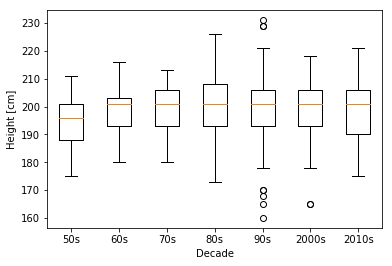

In [24]:
# рост игроков
plt.boxplot(data_height)
plt.xticks([1,2,3,4,5,6,7], ['50s','60s','70s','80s','90s','2000s','2010s'])
plt.ylabel('Height [cm]')
plt.xlabel('Decade')
plt.show()

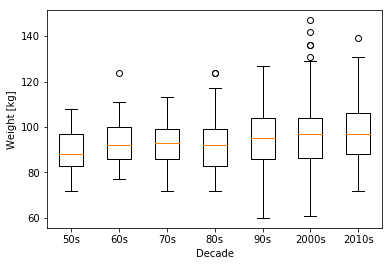

In [25]:
# вес игроков
plt.boxplot(data_weight)
plt.xticks([1,2,3,4,5,6,7], ['50s','60s','70s','80s','90s','2000s','2010s'])
plt.ylabel('Weight [kg]')
plt.xlabel('Decade')
plt.show()

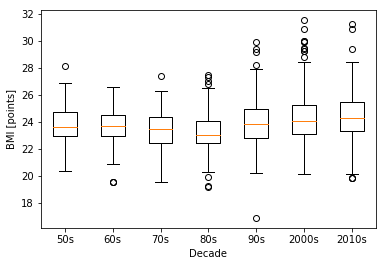

In [26]:
# индекс массы тела
plt.boxplot(data_bmi)
plt.xticks([1,2,3,4,5,6,7], ['50s','60s','70s','80s','90s','2000s','2010s'])
plt.ylabel('BMI [points]')
plt.xlabel('Decade')
plt.show()

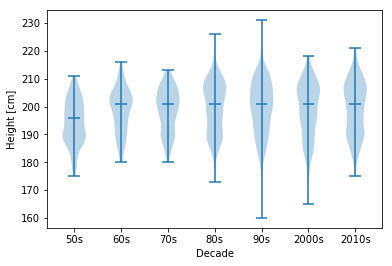

In [27]:
# можно заглянуть внутрь распределения с помощью графика violinplot
# построим его для роста игроков
plt.violinplot(data_height, showmedians=True)
plt.xticks([1,2,3,4,5,6,7], ['50s','60s','70s','80s','90s','2000s','2010s'])
plt.ylabel('Height [cm]')
plt.xlabel('Decade')
plt.show()

In [37]:
# TOP-10 игроков по очкам за одну игру
top_players = seasons.groupby('Player')[['pts_per_game']].mean().sort_values('pts_per_game', ascending=False)
top10 = top_players.head(10)
top10.style.bar()

,pts_per_game
Player,
Wilt Chamberlain*,30.6466
Michael Jordan*,29.4448
LeBron James,27.1211
Kevin Durant,27.0295
Jerry West*,26.7413
George Gervin*,26.1808
Bob Pettit*,26.1773
Oscar Robertson*,25.5264
Elgin Baylor*,25.2754


# seaborn

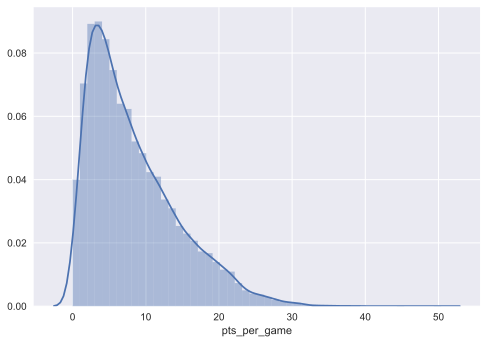

In [36]:
# попробуем seaborn
import seaborn as sns

# посмотрим на распределение набранных очков за одну игру
sns.distplot(seasons['pts_per_game'])
sns.plt.show()

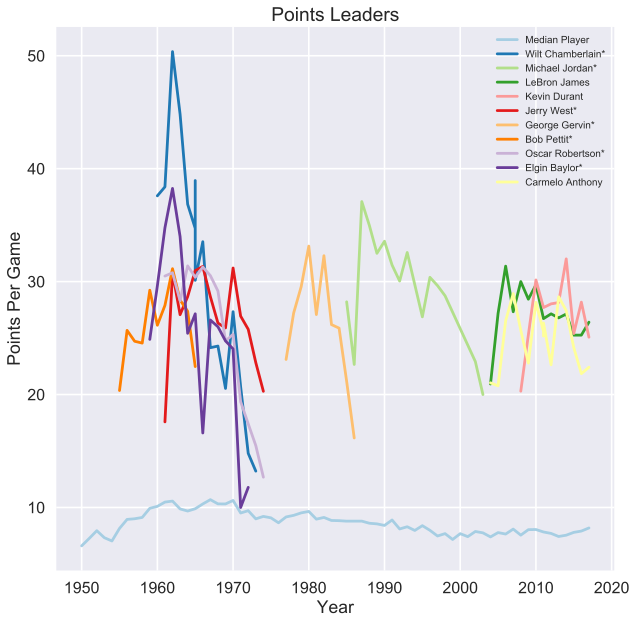

In [55]:
# посмотрим на статистику набора очков TOP-10 игроков
with sns.color_palette("Paired", 11):
    plt.figure(figsize = (10,10))
    plt.plot(seasons.Year.unique(), seasons.groupby('Year')[['pts_per_game']].mean())
    for i in range(10):
        plt.plot(seasons.Year[seasons.Player == top10.index[i]], seasons.pts_per_game[seasons.Player == top10.index[i]])
    
    plt.legend(['Median Player'] + list(top10.index.values), fontsize = 10)
    plt.xlabel('Year')
    plt.ylabel('Points Per Game')
    plt.title('Points Leaders')
    plt.show()

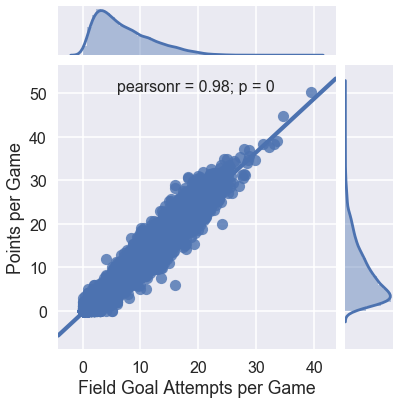

In [72]:
# посмотрим корреляцию между количеством совершенных бросков (удачных и неудачных) и набранными очками
%config InlineBackend.figure_format = 'png' 
sns.jointplot(x=seasons.FGA/seasons.G, y=seasons.pts_per_game, kind='reg')\
    .set_axis_labels("Field Goal Attempts per Game", "Points per Game")
sns.plt.show()

# Plotly

In [194]:
# поиграем с Plotly
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

import pandas as pd

init_notebook_mode(connected=True)

years = seasons.Year.apply(int).unique()

# make list of positions
positions = []
for position in seasons['Pos']:
    if position not in positions:
        positions.append(position)
        
# make figure
figure = {
    'data': [],
    'layout': {},
    'frames': []
}

# fill figure layouts
figure['layout']['xaxis'] = {'title': 'Weight', 'range': [50, 170], 'autorange': False}
figure['layout']['yaxis'] = {'title': 'Height', 'range': [130, 250], 'autorange': False}
figure['layout']['hovermode'] = 'closest'
figure['layout']['updatemenus'] = [
    {
        'buttons': [
            {
                'args': [None, {'frame': {'duration': 500, 'redraw': False},
                         'fromcurrent': True, 'transition': {'duration': 300, 'easing': 'quadratic-in-out'}}],
                'label': 'Play',
                'method': 'animate'
            },
            {
                'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate',
                'transition': {'duration': 0}}],
                'label': 'Pause',
                'method': 'animate'
            }
        ],
        'direction': 'left',
        'pad': {'r': 10, 't': 87},
        'showactive': False,
        'type': 'buttons',
        'x': 0.1,
        'xanchor': 'right',
        'y': 0,
        'yanchor': 'top'
    }
]

sliders_dict = {
    'active': 0,
    'yanchor': 'top',
    'xanchor': 'left',
    'currentvalue': {
        'font': {'size': 20},
        'prefix': 'Year:',
        'visible': True,
        'xanchor': 'right'
    },
    'transition': {'duration': 300, 'easing': 'cubic-in-out'},
    'pad': {'b': 10, 't': 50},
    'len': 0.9,
    'x': 0.1,
    'y': 0,
    'steps': []
}

# make init data
year = 1950
for position in positions:
    seasons_by_year = seasons[seasons['Year'] == year]
    seasons_by_year_and_team = seasons_by_year[seasons_by_year['Pos'] == position]

    data_dict = {
        'x': list(seasons_by_year_and_team['weight']),
        'y': list(seasons_by_year_and_team['height']),
        'mode': 'markers',
        'text': list(seasons_by_year_and_team['Player']),
        'name': str(position)
    }
    figure['data'].append(data_dict)
    
# make frames data
for year in years:
    frame = {'data': [], 'name': str(year)}
    for position in positions:
        seasons_by_year = seasons[seasons['Year'] == int(year)]
        seasons_by_year_and_team = seasons_by_year[seasons_by_year['Pos'] == position]

        data_dict = {
            'x': list(seasons_by_year_and_team['weight']),
            'y': list(seasons_by_year_and_team['height']),
            'mode': 'markers',
            'text': list(seasons_by_year_and_team['Player']),
            'name': str(position)
        }
        frame['data'].append(data_dict)

    figure['frames'].append(frame)
    slider_step = {'args': [
        [year],
        {'frame': {'duration': 300, 'redraw': False},
         'mode': 'immediate',
         'transition': {'duration': 300}}
     ],
     'label': year,
     'method': 'animate'}
    sliders_dict['steps'].append(slider_step)

figure['layout']['sliders'] = [sliders_dict]


# получаем график как менялся вес-рост игроков по годам с привязкой к позиции, которую они занимают на площадке
iplot(figure)